# Machine Learning in Python - Project 1

Due Friday, April 15th by 5 pm UK local time.

*include contributors names here*

## 0. Setup

In [229]:
# Add any additional libraries or submodules below

# Display plots inline
%matplotlib inline

# Data libraries
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80

# sklearn modules
import sklearn

import os
from google.colab import drive

In [ ]:
# Load data
drive.mount('/content/drive') # give permission
os.chdir('drive/My Drive/Colab Notebooks/ML for python/project 2')
d = pd.read_csv("hotel.csv")

Mounted at /content/drive


## 1. Introduction

*This section should include a brief introduction to the task and the data (assume this is a report you are delivering to a client). If you use any additional data sources, you should introduce them here and discuss why they were included.*

*Briefly outline the approaches being used and the conclusions that you are able to draw.*

## 2. Exploratory Data Analysis and Feature Engineering

*Include a detailed discussion of the data with a particular emphasis on the features of the data that are relevant for the subsequent modeling. Including visualizations of the data is strongly encouraged - all code and plots must also be described in the write up. Think carefully about whether each plot needs to be included in your final draft - your report should include figures but they should be as focused and impactful as possible.*

*Additionally, this section should also implement and describe any preprocessing / feature engineering of the data. Specifically, this should be any code that you use to generate new columns in the data frame `d`. All of this processing is explicitly meant to occur before we split the data in to training and testing subsets. Processing that will be performed as part of an sklearn pipeline can be mentioned here but should be implemented in the following section.*

*All code and figures should be accompanied by text that provides an overview / context to what is being done or presented.*

In [230]:
df = d.copy()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   is_canceled                     119390 non-null  int64  
 1   hotel                           119390 non-null  object 
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [231]:
# agent and company has a large amount of null values, however, these are considered not applicable, rather than missing.
# Besides, children and country have a small proportion of missing values, children are imputed by mean. #国家此处不确定要不要？
df['children'][df['children'].isna()] = round(df['children'].mean())
df = df.drop_duplicates() # remove duplicates
df.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


<class 'pandas.core.frame.DataFrame'>
Int64Index: 87138 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     87138 non-null  int64  
 1   hotel                           87138 non-null  object 
 2   lead_time                       87138 non-null  int64  
 3   arrival_date_year               87138 non-null  int64  
 4   arrival_date_month              87138 non-null  object 
 5   arrival_date_week_number        87138 non-null  int64  
 6   arrival_date_day_of_month       87138 non-null  int64  
 7   stays_in_weekend_nights         87138 non-null  int64  
 8   stays_in_week_nights            87138 non-null  int64  
 9   adults                          87138 non-null  int64  
 10  children                        87138 non-null  float64
 11  babies                          87138 non-null  int64  
 12  meal                           

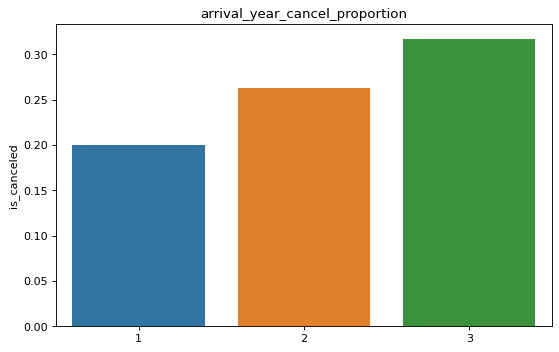

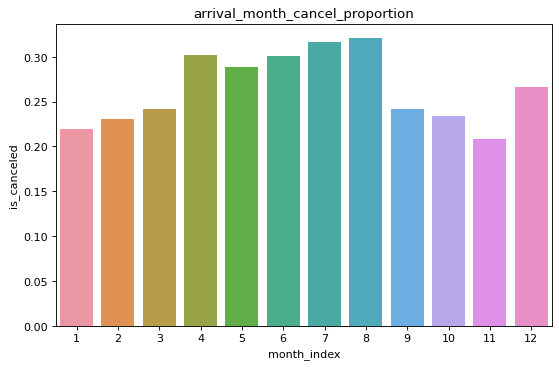

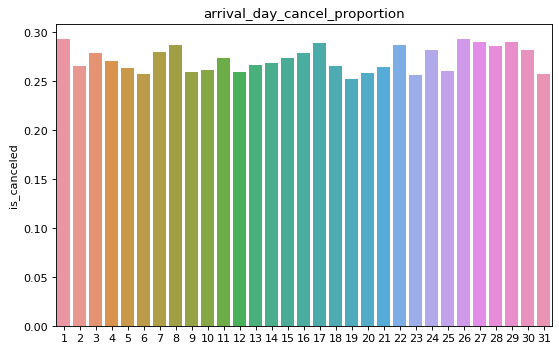

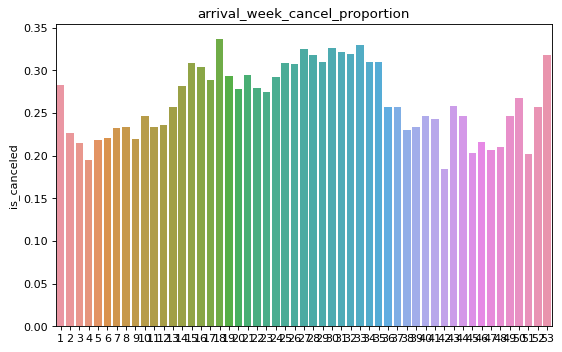

In [232]:
arrival_year_cancel_proportion = df.groupby(['arrival_date_year'])['is_canceled'].sum('is_canceled')/df.groupby(['arrival_date_year'])['is_canceled'].count()
sns.barplot(x= [i for i in range(1, len(arrival_year_cancel_proportion)+1)], y=arrival_year_cancel_proportion).set(title='arrival_year_cancel_proportion')
plt.show()

arrival_month_cancel_proportion = df.groupby(['arrival_date_month'])['is_canceled'].sum('is_canceled')/df.groupby(['arrival_date_month'])['is_canceled'].count()
month_df = arrival_month_cancel_proportion.to_frame().reset_index()
month_df['month_index'] = [4,8,12,2,1,7,6,3,5,11,10,9]
sns.barplot(x = month_df['month_index'], y = month_df['is_canceled']).set(title='arrival_month_cancel_proportion')
plt.show()

arrival_day_cancel_proportion = df.groupby(['arrival_date_day_of_month'])['is_canceled'].sum('is_canceled')/df.groupby(['arrival_date_day_of_month'])['is_canceled'].count()
sns.barplot(x= [i for i in range(1, len(arrival_day_cancel_proportion)+1)], y=arrival_day_cancel_proportion).set(title='arrival_day_cancel_proportion')
plt.show()

arrival_week_cancel_proportion = df.groupby(['arrival_date_week_number'])['is_canceled'].sum('is_canceled')/df.groupby(['arrival_date_week_number'])['is_canceled'].count()
sns.barplot(x= [i for i in range(1, len(arrival_week_cancel_proportion)+1)], y=arrival_week_cancel_proportion).set(title='arrival_week_cancel_proportion')
plt.show()

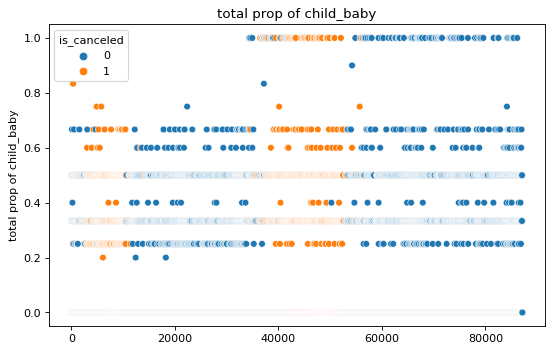

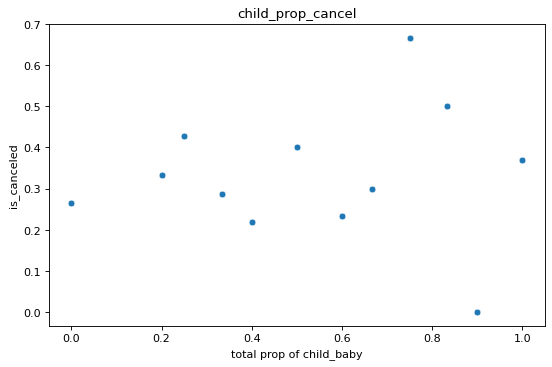

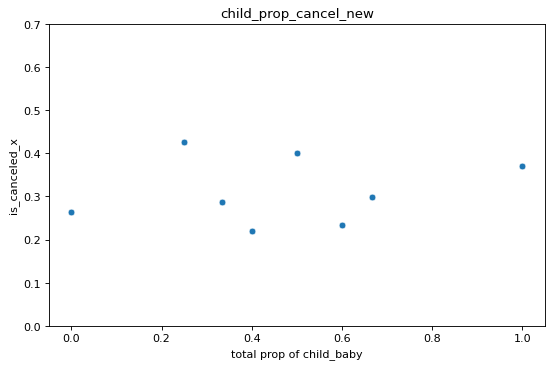

In [233]:
df['total prop of child_baby'] = (df['children'] + df['babies'])/(df['children'] + df['babies'] + df['adults'])
sns.scatterplot(x= [i for i in range(1, len(df['total prop of child_baby'])+1)], y=df['total prop of child_baby'], hue=df['is_canceled']).set(title='total prop of child_baby')
plt.show()
# for each proportion of child_baby, calculate the percentage of cancellation
child_prop_cancel = df.groupby(['total prop of child_baby'])['is_canceled'].sum('is_canceled')/df.groupby(['total prop of child_baby'])['is_canceled'].count()
child_df = child_prop_cancel.to_frame().reset_index()
sns.scatterplot(x=child_df['total prop of child_baby'], y=child_df['is_canceled']).set(title='child_prop_cancel')
plt.show()
# some points are calculated by very few datapoints

# further
quant = df.groupby(['total prop of child_baby'])['is_canceled'].count()
quant_df = quant.to_frame().reset_index()
quant_child_df = pd.merge(child_df, quant_df, on='total prop of child_baby', how='left')
sns.scatterplot(x = quant_child_df[quant_child_df['is_canceled_y'] > 10]['total prop of child_baby'], 
                    y = quant_child_df[quant_child_df['is_canceled_y'] > 10]['is_canceled_x']).set(title='child_prop_cancel_new', ylim=(0, 0.7))
plt.show()
# no obvious trend...

[Text(0.5, 1.0, 'country versus cancellation percentage')]

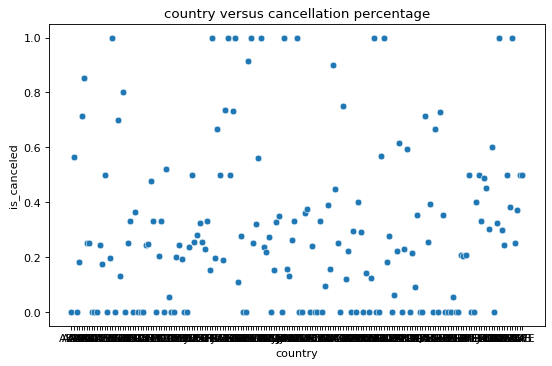

In [234]:
# percentage of cancellation in each country
country_temp = df.groupby(['country'])['is_canceled'].sum()/df.groupby(['country'])['is_canceled'].count()
country_df = country_temp.to_frame().reset_index()
sns.scatterplot(x=country_df['country'], y=country_df['is_canceled']).set(title='country versus cancellation percentage')

In [235]:
# data check If is_repeated guest =0, then previous_booking must be 0
sum(df[df['is_repeated_guest'] == 0]['previous_bookings_not_canceled'] != 0)
# it seems that 745 rows of data are wrong?

745

In [236]:
df['reserved equal assigned'] = np.where((df['reserved_room_type'] == df['assigned_room_type']), 1, 0)
# 想不出下一步画什么样的图

In [237]:
df['booking_changes'].median()

0.0

[(0.0, 1.0), Text(0.5, 1.0, 'deposit_type versus cancellation percentage')]

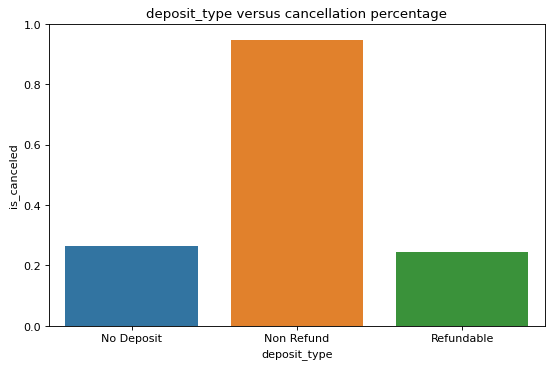

In [238]:
depos = df.groupby(['deposit_type'])['is_canceled'].sum()/df.groupby(['deposit_type'])['is_canceled'].count()
depos_df = depos.to_frame().reset_index()
depos_df
sns.barplot(x = depos_df['deposit_type'], y=depos_df['is_canceled']).set(title='deposit_type versus cancellation percentage', ylim=(0,1))

[Text(0.5, 1.0, 'agent versus cancellation percentage')]

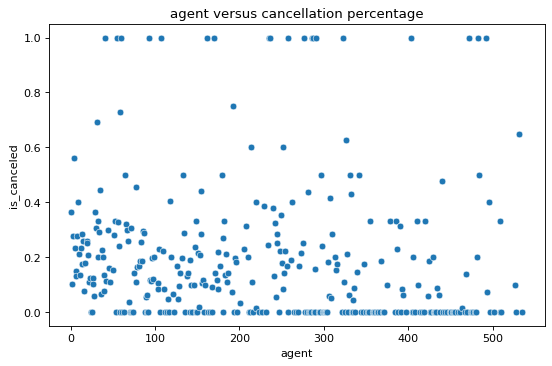

In [239]:
# cancellation percentage for each agent
agent_perc = df.groupby(['agent'])['is_canceled'].sum()/df.groupby(['agent'])['is_canceled'].count()
agent_perc = agent_perc.to_frame().reset_index()
agent_perc
sns.scatterplot(x=agent_perc['agent'], y=agent_perc['is_canceled']).set(title='agent versus cancellation percentage')

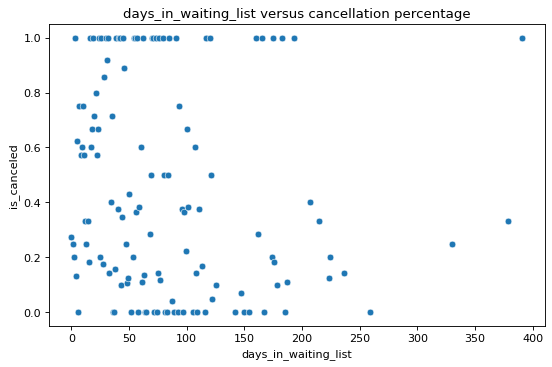

have_days_in_wl
0    0.272172
1    0.331759
Name: is_canceled, dtype: float64

In [240]:
days_wl = df.groupby(['days_in_waiting_list'])['is_canceled'].sum()/df.groupby(['days_in_waiting_list'])['is_canceled'].count()
days_wl_df = days_wl.to_frame().reset_index()
sns.scatterplot(x=days_wl_df['days_in_waiting_list'], y=days_wl_df['is_canceled']).set(title='days_in_waiting_list versus cancellation percentage')
plt.show()
df['have_days_in_wl'] = np.where((df['days_in_waiting_list'] != 0), 1, 0)
df.groupby(['have_days_in_wl'])['is_canceled'].sum()/df.groupby(['have_days_in_wl'])['is_canceled'].count()
# no obvious difference, as 27% is very close to 33%

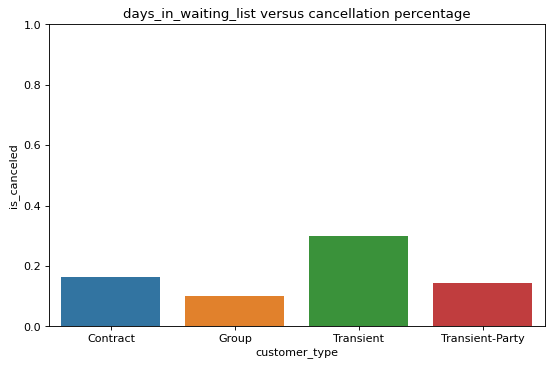

In [241]:
cust_type = df.groupby(['customer_type'])['is_canceled'].sum()/df.groupby(['customer_type'])['is_canceled'].count()
cust_type_df = cust_type.to_frame().reset_index()
sns.barplot(x=cust_type_df['customer_type'], y=cust_type_df['is_canceled']).set(title='days_in_waiting_list versus cancellation percentage', ylim=(0,1))
plt.show()

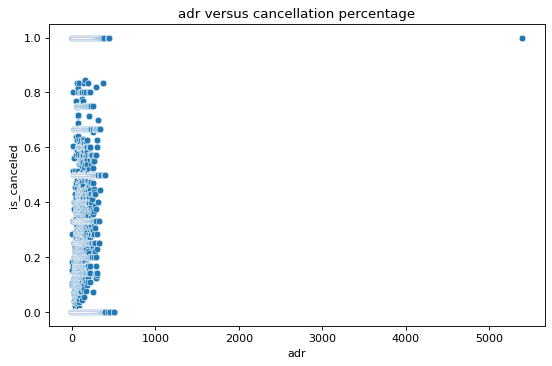

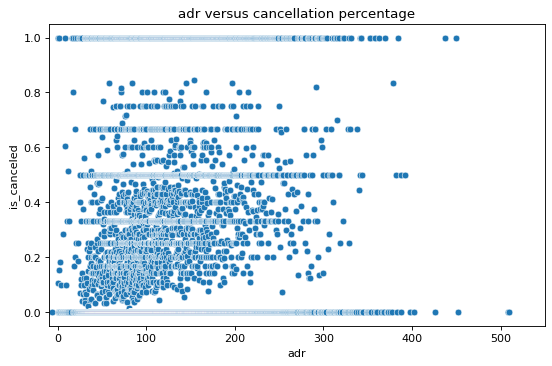

In [242]:
adr_temp = df.groupby(['adr'])['is_canceled'].sum()/df.groupby(['adr'])['is_canceled'].count()
adr_df = adr_temp.to_frame().reset_index()
sns.scatterplot(x=adr_df['adr'], y=adr_df['is_canceled']).set(title='adr versus cancellation percentage')
plt.show()
# ignore the outlier on the right top
sns.scatterplot(x=adr_df['adr'], y=adr_df['is_canceled']).set(title='adr versus cancellation percentage', xlim=(-10,550))
plt.show()
# if we ignore cancellation percentage=0 and cancellation percentage=1, adr is somehow positively correlated with cancellation percentage

In [243]:
df[df['adults'] < df['required_car_parking_spaces']]['required_car_parking_spaces'].count()
# there are 16 rows having adults fewer than required_car_parking_spaces, abnormal data, consider to be removed

16

In [244]:
car_parking = df[df['adults'] >= df['required_car_parking_spaces']][['required_car_parking_spaces', 'is_canceled']]
car_parking.groupby('required_car_parking_spaces')['is_canceled'].sum()/df.groupby(['required_car_parking_spaces'])['is_canceled'].count()
# if required car parking is 0, then it has a 29.77% probability that they will cancel the order, if they require car parking, then they will not cancel the order, however...

required_car_parking_spaces
0    0.297739
1    0.000000
2    0.000000
3         NaN
8         NaN
Name: is_canceled, dtype: float64

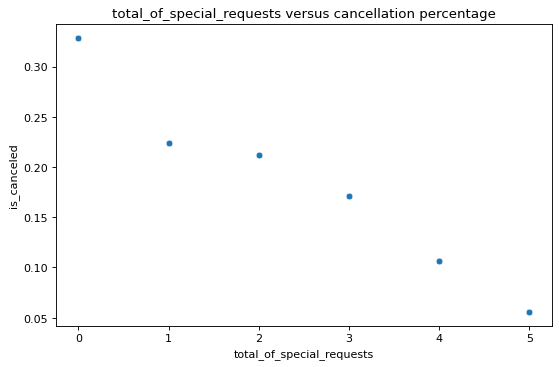

In [245]:
special_req = df.groupby('total_of_special_requests')['is_canceled'].sum()/df.groupby(['total_of_special_requests'])['is_canceled'].count()
special_req = special_req.to_frame().reset_index()
sns.scatterplot(x=special_req['total_of_special_requests'], y=special_req['is_canceled']).set(title='total_of_special_requests versus cancellation percentage')
plt.show()
# obvious negative correlation

## 3. Model Fitting and Tuning

*In this section you should detail your choice of model and describe the process used to refine and fit that model. You are strongly encouraged to explore many different modeling methods (e.g. logistic regression, classification trees, SVC, etc.) but you should not include a detailed narrative of all of these attempts. At most this section should mention the methods explored and why they were rejected - most of your effort should go into describing the model you are using and your process for tuning and validatin it.*

*This section should also include the full implementation of your final model, including all necessary validation. As with figures, any included code must also be addressed in the text of the document.*

## 4. Discussion & Conclusions


*In this section you should provide a general overview of your final model, its performance, and reliability. You should discuss what the implications of your model are in terms of the included features, predictive performance, and anything else you think is relevant.*

*This should be written with a target audience of the client who is with the hotel data and university level mathematics but not necessarily someone who has taken a postgraduate statistical modeling course. Your goal should be to convince this audience that your model is both accurate and useful.*

*Keep in mind that a negative result, i.e. a model that does not work well predictively, that is well explained and justified in terms of why it failed will likely receive higher marks than a model with strong predictive performance but with poor or incorrect explinations / justifications.*